### Salary vs years of experience 

Here we're looking at person's salary and their years of experience. We want to see if the salary data conforms to the expectations of having long right tail. Next we would like to see if and how well the years of experience can predict the salary for this organization. 

In [20]:
import pandas as pd
df = pd.read_csv('Salary_Data-2.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
# Descriptive statistics
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [18]:
# Skewness
skewness = df['Salary'].skew()
print(f'Skewness: {skewness}')

# Mode
mode = df['Salary'].mode()
print(f'Mode: {mode[0]}')  # mode returns a Series, get the value with mode[0]

# Median
median = df['Salary'].median()
print(f'Median: {median}')
mean = df['Salary'].mean()
print(f'Mean: {mean}')

Skewness: 0.35411967922959153
Mode: 37731.0
Median: 65237.0
Mean: 76003.0


We can see the skew in the dataset, wher median is less than mean and mode is far lower than eithe mode or median. This is typical for salary data.

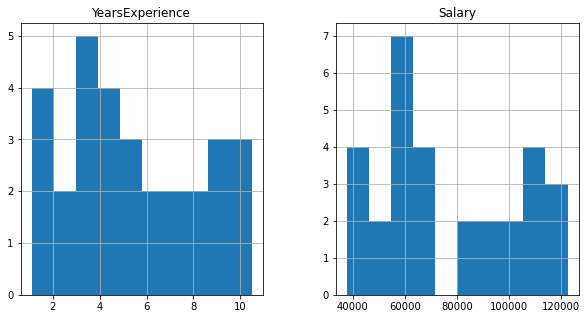

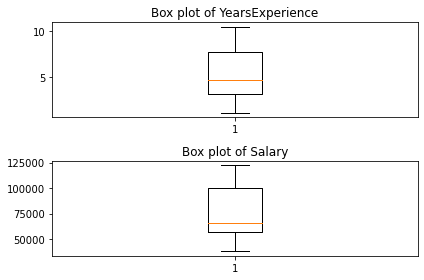

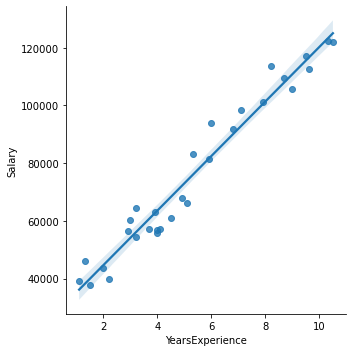

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist( figsize=(10, 5))
plt.show()

import matplotlib.pyplot as plt

# Create a new figure
fig, axs = plt.subplots(2)

# Create a box plot for 'YearsExperience'
axs[0].boxplot(df['YearsExperience'])
axs[0].set_title('Box plot of YearsExperience')

# Create a box plot for 'Salary'
axs[1].boxplot(df['Salary'])
axs[1].set_title('Box plot of Salary')

# Display the plot
plt.tight_layout()
plt.show()


# Scatter plot with regression line
sns.lmplot(x='YearsExperience', y='Salary', data=df)

plt.show()



     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


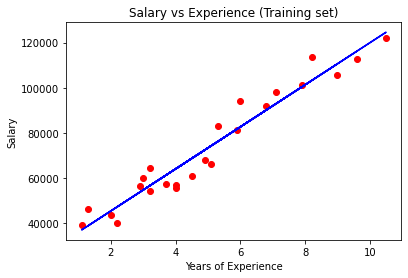

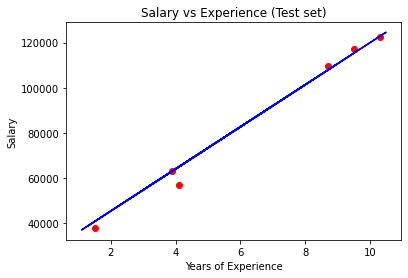

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Let's assume that 'df' is your DataFrame

# Define the features and the target
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the Salary
y_pred = model.predict(X_test)

# Compare the actual output values for X_test with the predicted values
df_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df_comparison)

# Visualize the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualize the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


We can see that for this organization years of experience is the main predictor of salary.